In [1]:
#Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 


In [2]:
#Reading CSV file
df = pd.read_csv(r'C:\Users\NEEL\Untitled Folder\KNN\Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [6]:
df.shape

(101, 18)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [9]:
#Checking missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

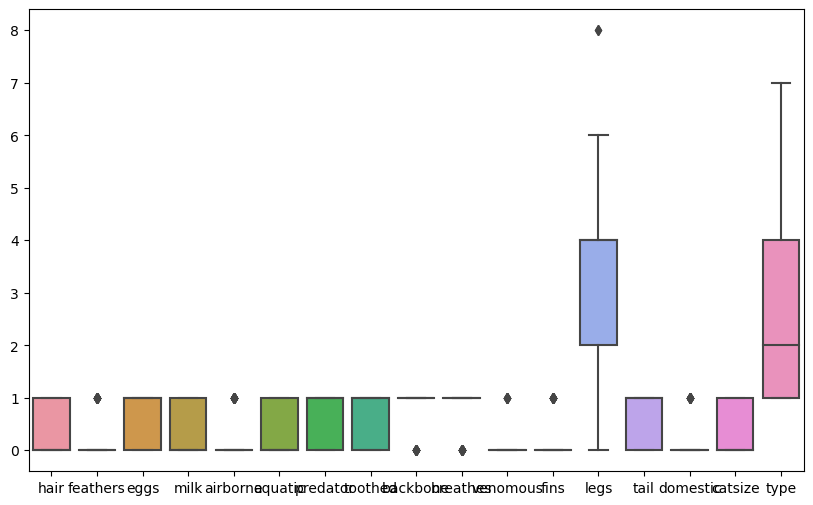

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

# Model Building 

In [14]:
df.drop(['animal name'],axis=1,inplace=True)

In [15]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
#Standerization
X = df.drop(['type'],axis=1)
y = df['type']

In [18]:
print(X)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [19]:
print(y)

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64


In [21]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled)

[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]
 ...
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ... -1.69841555 -0.38435306
  -0.87859537]
 [-0.86103386  2.01246118  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]]


In [22]:
#Spilting training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,y,test_size=0.2, random_state=1)

In [27]:
print(xtrain.shape,xtest.shape)

(80, 16) (21, 16)


In [28]:
#Creating instance for KNN 
knn = KNeighborsClassifier()

In [29]:
error_rate = []
for i in range(1,10):
 
 KNN = KNeighborsClassifier(n_neighbors=i)
 KNN.fit(xtrain,ytrain)
 pred_i = KNN.predict(xtest)
 error_rate.append(np.mean(pred_i != ytest))
print(error_rate)

[0.047619047619047616, 0.14285714285714285, 0.09523809523809523, 0.047619047619047616, 0.14285714285714285, 0.09523809523809523, 0.09523809523809523, 0.09523809523809523, 0.19047619047619047]


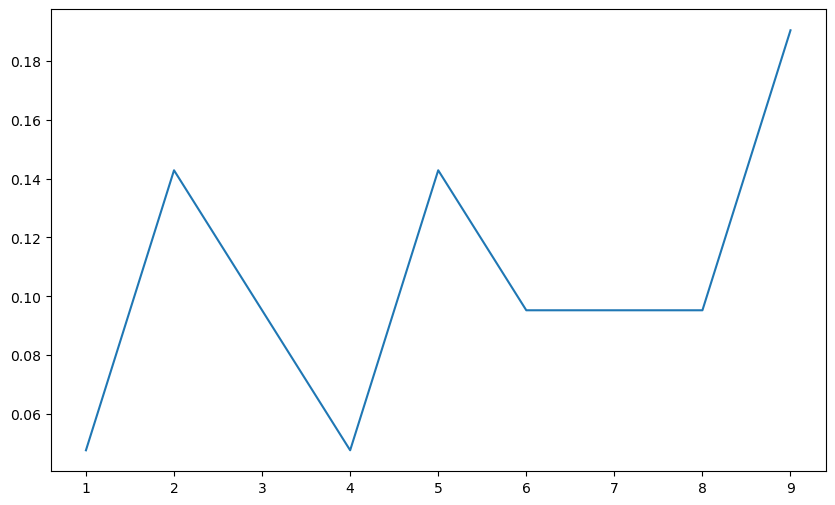

In [30]:
plt.figure(figsize=(10,6))
k_values = [1,2,3,4,5,6,7,8,9]
plt.plot(k_values,error_rate)
plt.show()

In [31]:
KNN_4 = KNeighborsClassifier(n_neighbors=5)
KNN_4.fit(xtrain,ytrain)
y_pred = KNN_4.predict(xtest)

In [32]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.71      1.00      0.83         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.86        21
   macro avg       0.53      0.50      0.50        21
weighted avg       0.84      0.86      0.83        21



c:\Users\NEEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEEL\anaconda3\lib\site-packages\sklearn\metrics\_classif